<a href="https://colab.research.google.com/github/arizonaCameraLab/computationalImaging/blob/master/Chapter2ForwardModels/noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Noise
## Computational Optical Imaging Section 2.8
## David Brady
## University of Arizona


This notebook implements several simple simulations in support of the video Computational Optical Imaging Episode 9 Noise

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

## Poisson and Gaussian distributions

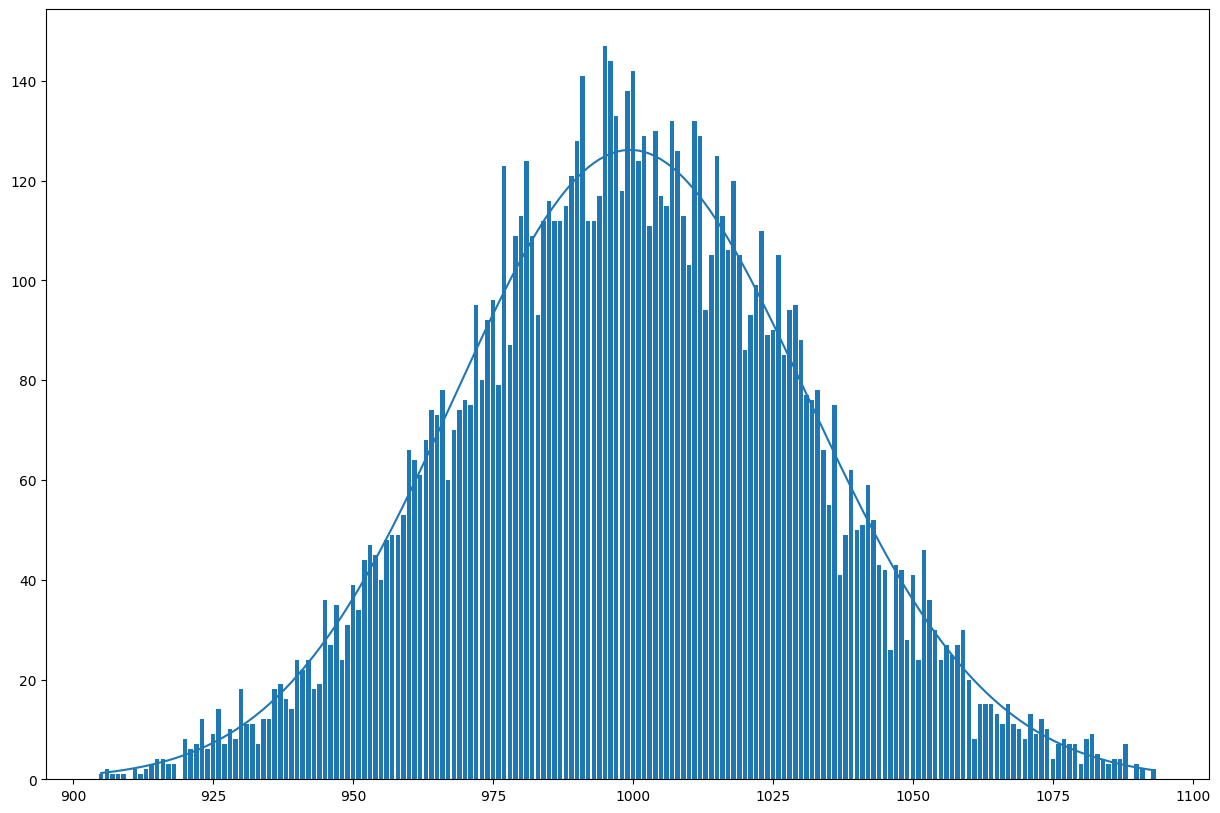

In [57]:
# prompt: show the histogram of 100 draws from a poisson distribution with mean 100
plt.figure(figsize=(15,10))
mean=1000
samples=10000
xC=np.arange(np.int64(mean-3*np.sqrt(mean)),np.int64(mean+3*np.sqrt(mean)))
x = np.random.poisson(mean, samples)
histo=np.histogram(x, bins=len(xC), range=(np.int64(mean-3*np.sqrt(mean)),np.int64(mean+3*np.sqrt(mean))))
plt.bar(histo[1][:-1], histo[0])
y = poisson.pmf(xC, mu=mean)
plt.plot(xC,samples*y )
plt.show()


## a poisson stream

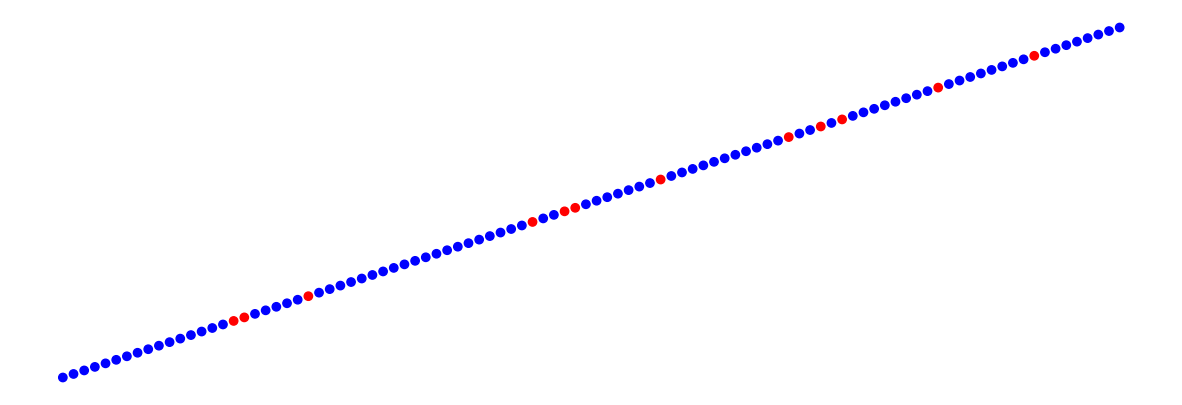

In [37]:
# prompt: plot a sequence of colored dots. the color of each dot is selected randomly. The probability that a dot is red is .1. the probability that it is blue is .9
plt.figure(figsize=(15,5))
N=100
x = np.arange(N)
y = np.arange(N)
colors = []
for i in range(N):
  if np.random.rand()<.1:
    colors.append('red')
  else:
    colors.append('blue')
plt.scatter(x,y,c=colors)
plt.axis('off')
plt.show()


## Spatial noise patterns

Text(0.5, 1.0, '10000 photons per pixel')

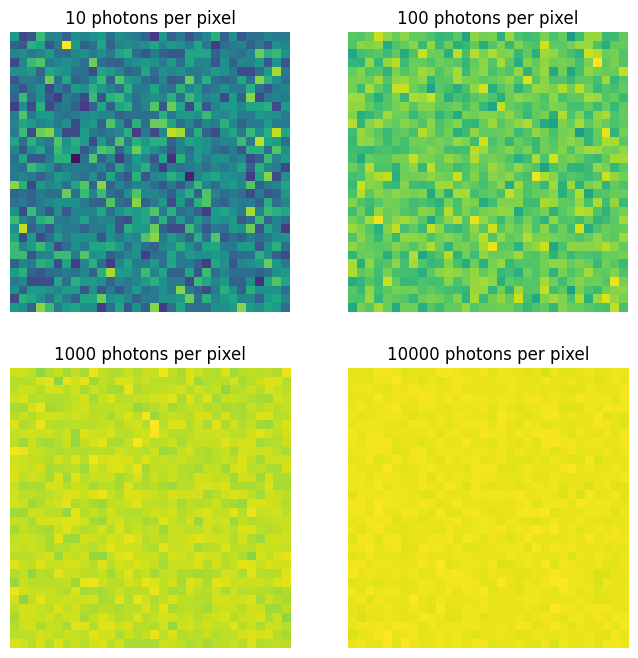

In [72]:
# poisson noise vs photon flux
plt.figure(figsize=(8,8))
image= np.ones((32,32))
plt.subplot(2,2,1)
a=np.random.poisson(image*10.)
plt.imshow(a, vmin=0)
plt.axis('off')
plt.title('10 photons per pixel')
plt.subplot(2,2,2)
b=np.random.poisson(image*100.)
plt.imshow(b,vmin=0)
plt.axis('off')
plt.title('100 photons per pixel')
plt.subplot(2,2,3)
c=np.random.poisson(image*1000.)
plt.imshow(c,vmin=0)
plt.axis('off')
plt.title('1000 photons per pixel')
plt.subplot(2,2,4)
d=np.random.poisson(image*10000.)
plt.imshow(d,vmin=0)
plt.axis('off')
plt.title('10000 photons per pixel')



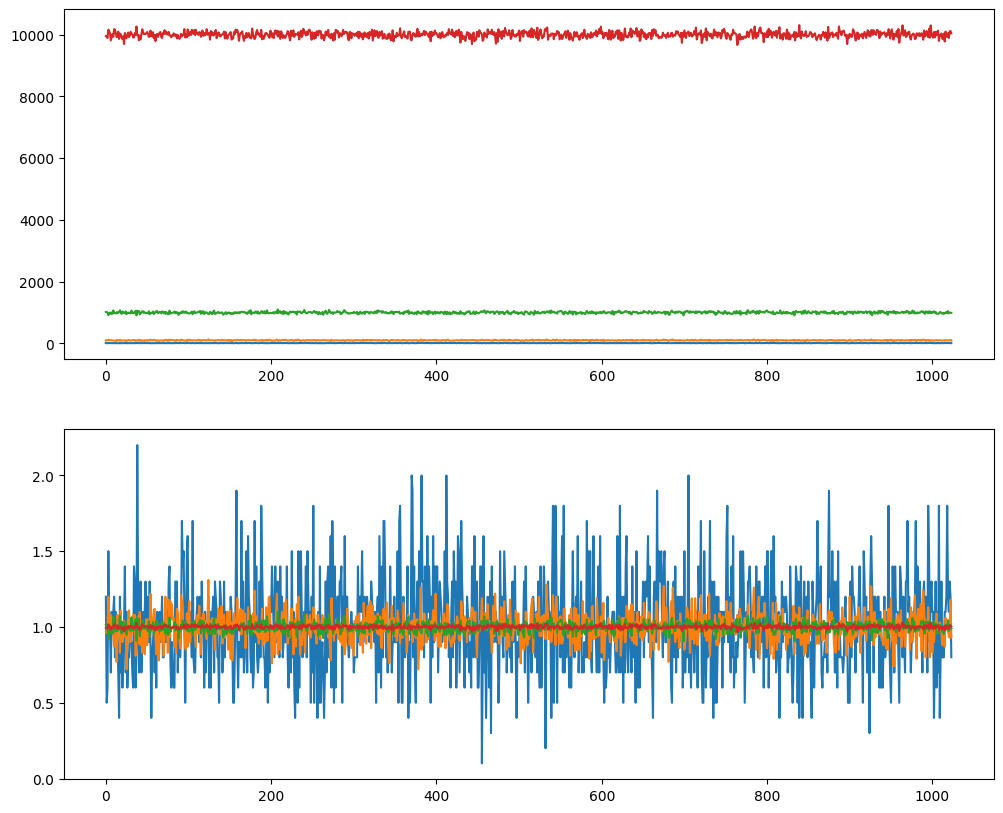

In [73]:
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
plt.plot(a.flatten())
plt.plot(b.flatten())
plt.plot(c.flatten())
plt.plot(d.flatten())
plt.subplot(2,1,2)
plt.plot(a.flatten()/10)
plt.plot(b.flatten()/100)
plt.plot(c.flatten()/1000)
plt.plot(d.flatten()/10000)
plt.show()

### same plots with gaussian noise

Text(0.5, 1.0, '10000 photons per pixel')

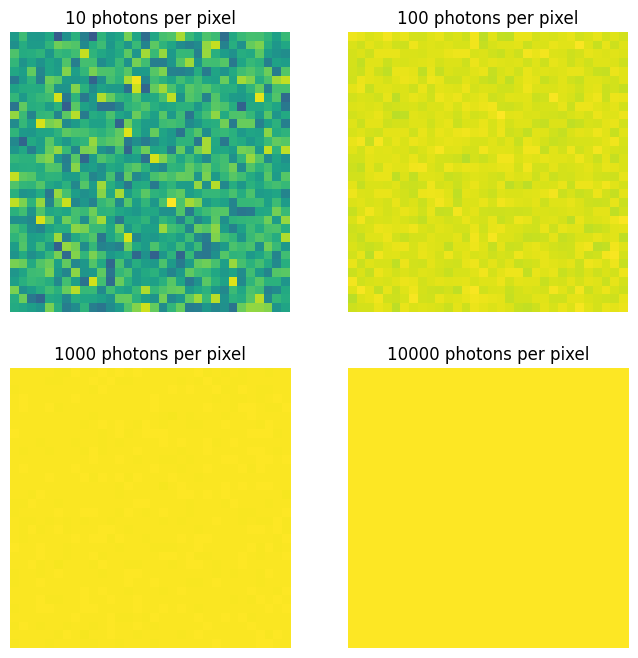

In [74]:
# poisson noise vs photon flux
plt.figure(figsize=(8,8))
image= np.ones((32,32))
plt.subplot(2,2,1)
ag=image*10.+np.random.normal(0,2,image.shape)
plt.imshow(ag, vmin=0)
plt.axis('off')
plt.title('10 photons per pixel')
plt.subplot(2,2,2)
bg=image*100.+np.random.normal(0,2,image.shape)
plt.imshow(bg, vmin=0)
plt.axis('off')
plt.title('100 photons per pixel')
plt.subplot(2,2,3)
cg=image*1000.+np.random.normal(0,2,image.shape)
plt.imshow(cg, vmin=0)
plt.axis('off')
plt.title('1000 photons per pixel')
plt.subplot(2,2,4)
dg=image*10000.+np.random.normal(0,2,image.shape)
plt.imshow(dg, vmin=0)
plt.axis('off')
plt.title('10000 photons per pixel')


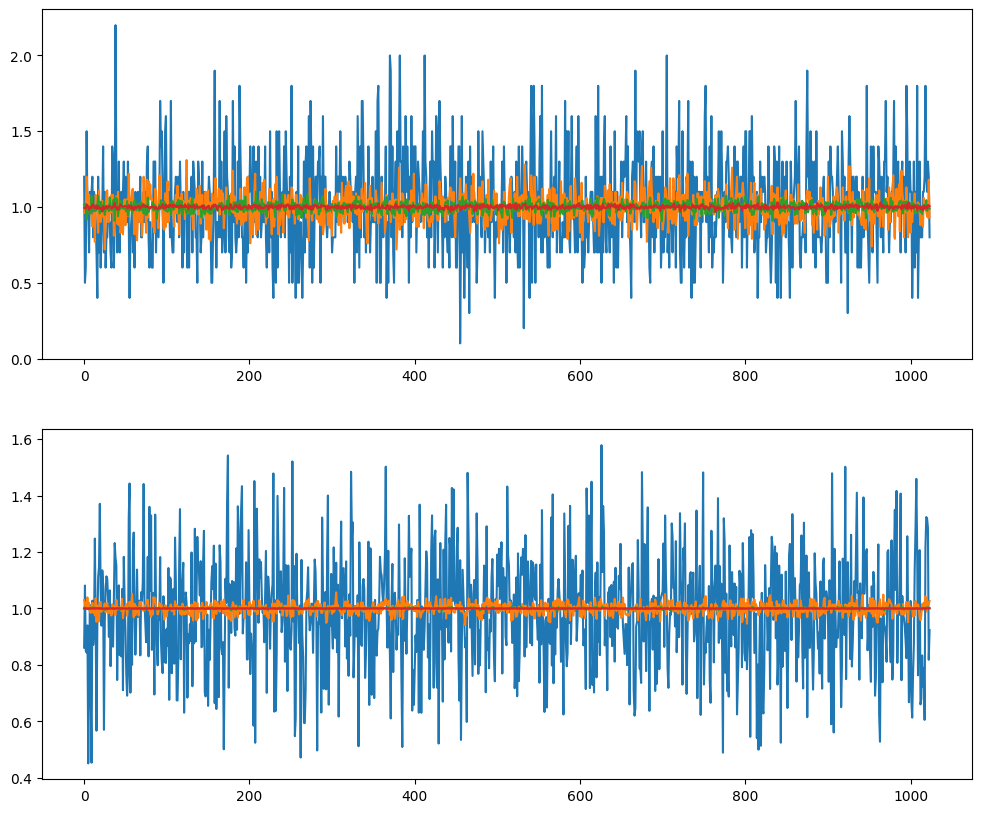

In [75]:
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
plt.plot(a.flatten()/10)
plt.plot(b.flatten()/100)
plt.plot(c.flatten()/1000)
plt.plot(d.flatten()/10000)
plt.subplot(2,1,2)
plt.plot(ag.flatten()/10)
plt.plot(bg.flatten()/100)
plt.plot(cg.flatten()/1000)
plt.plot(dg.flatten()/10000)
plt.show()